# Gather three pieces of data
- twitter-archive-enhanced.csv; provided to me directly as a download by a Udacity "Instructor."
    - Needed to figure out how to save it to the appropriate directory so it becomes visible/accessible by this very notebook.
- from udacity's network, a *.tsv file.
    - Needed tp programatically acquire this data using Python's `request` module.
- from Twitter
    - Needed to interface with Twitter API

In [1]:
import pandas as pd
import requests
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Gather the first piece
The "csv file provided by instructor" simulates a work scenario wherein a file is provided to me locally, like on a thumb drive or by email. The task here is to make that file available for use in my `Jupyter Notebook`. First, I need to save the file somewhere on my hard drive. Then, from my `Jupyter Notebook`, click on the orange icon to go to the listing of files in my active directory. Then, click the upload icon and upload the file from my hard drive to the `Jupyter Notebook`'s directory. Once the file had been uploaded, I was able to use `read_csv` to read the csv in as a dataframe `df1`.

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

Here is a view of df1's head:

In [3]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Gather the second piece
I struggled a bit here as I felt confused between applying the lessons learned in lesson 2.8 (Source: Scraping the Web) or 2.12 (Source: Downloading Files from the Internet). As it turns out, the latter was correct. Here, I learn and leverage the magic of Python's `Requests` module and `os` file IO operations. You can see that I entered `import requests` and `import os` at the very top of this notebook.

Here, I define and set a url variable then call `request`'s get method to get info from the url.

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

Here, I access the tsv (tab separated values) file at the url and write the response content as file "image-predictions.tsv".

In [ ]:
with open ('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

Here, I use `read_csv` but with `sep='\t'` to account for tab separators instead of comma separators to read the data into a dataframe.

In [5]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Gather the third piece
For each Tweet ID we are asked to gather additional info (Retweet count and Favorite count) from Twitter. Here, I am learning about querying info from Twitter's API. First I created a Twitter account, then a Developer account. The Developer account application process asked why I want an account. I answered as prescribed by Udacity, basically saying that I'm a student trying to learn about app creation and Data Wrangling. While I don't see my Twitter endeavour as actual app creation, I'm excited to learn how to query data from Twitter. Udacity provides code that enables me to do just that through a Python library, "Tweepy".

In [6]:
import tweepy

consumer_key = 'fKFoHpk6LJMgYdXNDDnZyt1mz'
consumer_secret = 'GUzzXCBV40C8DJTt0wV1FEdCIorp5nK77j5ig3Aam9E4Q8rUjK'
access_token = '1054964110344052736-382fWZ6OW2kd4Hnr66XIGdptiZvHse'
access_secret = 'BtvbGYpDEn3hjO8JBRIaGaE2kkhKluNGNxXnFDQ9wOZw7'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

See that last line `api = tweepy.API(auth)`? I believe that creates an API Object. I can use it (`api`) and its `methods` to gather Twitter data.

Udacity provides a `StackOverflow answer` that describes how to get tweet JSON data via tweet ID using Tweepy.

### Taking inventory of the advice/hints/tools I'm given:
Somehwere in my code I'm advised to include these:

In Tweepy's `get_status` call:
- api.get_status(tweet_id, tweet_mode='extended')

In the tweepy.api class:
- wait_on_rate_limit = True
- wait_on_rate_limit_notify = True

In the "Getting Started" doc I saw this:

`API.retweets(id[, count])
Returns up to 100 of the first retweets of the given tweet.
Parameters
• id – The numerical ID of the status.
• count – Specifies the number of retweets to retrieve.
Return type list of Status objects`

Also in the "Getting Started" I saw this:

`API.favorites([id ][, page ])
Returns the favorite statuses for the authenticating user or user specified by the ID parameter.
Parameters
• id – The ID or screen name of the user to request favorites
• page – Specifies the page of results to retrieve. Note: there are pagination limits.
Return type list of Status objects`

### Can I even do one?
Let's see if we can get data about one tweet id. Trying '892420643555336193'

In [7]:
tweet = api.get_status('892420643555336193')
print ('Retweet count is:',tweet.retweet_count,'Favorite count is:',tweet.favorite_count)
#Wow that was easy. Also noted if I print (tweet.text) then I see the word "json"

Retweet count is: 8376 Favorite count is: 38241


Success with one!

### Deciding whether to improvise to make the loop or study fellow students' lessons learned so I can see what to avoid.
At this point I'm thinking should I improvise and try to loop through the tweet ids of DF1 and make a dataframe of retweet_counts and favorite_counts? Or, should I read the lesson hints and "Student Hub" stories to see what clues they provide? I'll try the latter for now. I've bulletized and shared my thoughts with you.
- Ooooh I see in the "Student Hub" that DmitryK was only getting a few results from queries. Turns out he didn't take into account Twitter's 15 minute increment rate limits. Setting the wait_on_rate_limit and wait_on_rate_limit_notify parameters to True in the tweepy.api class likely helped him get over this problem, but I wonder how specifically he did that. Googling that... Oh wow! Per http://docs.tweepy.org/en/v3.5.0/api.html those two items are simply parameters that we pass in the api statement. What other clues can I get from the Lesson/Student Hub?

- Wow, in the Student Hub, student "ilknur C", in a side discussion under "", discussed a seemingly difficult problem related to plots not showing when creating PDFs. Only text showing.

- Another one -- Student Gregory G. in discussion, "Hi. For the project..." was trying to write an entire tweet file to a text file and ran into problems. Fellow student DmitryK advised just extract the features/fields you need (like Retweet_count and Favorite_count).

### Checking my ability to create an empty list and add to it.

In [8]:
#Let's create a three item list
list=[]

and prove ability to append. Yes! Both of the following worked. I'll comment them out for now:

In [54]:
#list.append(['a','b','c']) #Given more time I can drop this placeholder line.
#print (list)

### The fanciest loop of my life so far.
Right about here, I'm trying to figure out how to programmatically loop with twitter to populate the list. Only after then would I create a data frame from the full list.

In [10]:
#Let's see if we can create a loop that pulls from Twitter and populates that `list`.
#i = 0
#j = 0
#for tweet_id in df1['tweet_id']:
    #try:
        #tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        #list.append([tweet_id,tweet.retweet_count,tweet.favorite_count])
        #i = i+1
        #print ('Got a pair. Thats',i,'of',i+j)
    #except:
        #print ('Tweet ID ',tweet_id,'has likely been deleted. Didnt find it in Twitter query.')
        #j = j+1

In [11]:
#df3=pd.DataFrame(list,columns=['tweet_id','retweet_count','favorite_count'])

Note at this point I have already produce the df3 from the Twitter API and loop. Since it takes a long time to run each time, I wrote the df3 to a csv file for easy accessibility. I also simply commented out the Twitter API get_status call. From this point forward, every time I re-open my Jupyter notebook, I will just use `read_csv` to read the df3 that I saved in the same directory as this very notebook.

In [12]:
df3 = pd.read_csv('df3.csv')

In [13]:
#let's see the df3 head
df3.head()

,Unnamed: 0,tweet_id,retweet_count,favorite_count
0,0,a,b,c
1,1,892420643555336193,8395,38283
2,2,892177421306343426,6195,32815
3,3,891815181378084864,4100,24706
4,4,891689557279858688,8528,41603


# Assess the Data
Now that I've gathered all three pieces of data, it's time to start assessing the data's cleanliness -- its quality and tidiness. But, first I simply display all three data frames to get more familiar with each of their columns.

In [14]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
df3

,Unnamed: 0,tweet_id,retweet_count,favorite_count
0,0,a,b,c
1,1,892420643555336193,8395,38283
2,2,892177421306343426,6195,32815
3,3,891815181378084864,4100,24706
4,4,891689557279858688,8528,41603
5,5,891327558926688256,9242,39789
6,6,891087950875897856,3074,19969
7,7,890971913173991426,2040,11691
8,8,890729181411237888,18632,64621
9,9,890609185150312448,4214,27456


## Get more familiar with each DF: Export to a Spreadsheet
### Perform scrolling visual inspections.

Here, I write all three dfs to csvs so I can open them in Excel.

In [55]:
#df1.to_csv('df1.csv') #This worked!
#df2.to_csv('df2.csv') #This worked!
#df3.to_csv('df3.csv') #This worked!

After exporting to csv files, I downloaded them to my hard drive commented the above three lines out and opened them in Excel for scrolling visual inspections and assessments.

- df1: column familiarization
    - tweet_id: The id number of the tweet.
    - in_reply_to_status_id: indicates whether the tweet was a reply
    - in_reply_to_user_id: if was a reply then to whom
    - timestamp: time stamp of tweet
    - source: this is a url address, from where the tweet was made
    - text: The tweet's text
    - retweeted_status_id: indicates whether tweet was retweeted
    - retweeted_status_user_id: if was retweeted then by whom
    - retweeted_status_timestamp: if was retweeted then when
    - expanded_urls: the url of the tweet
    - rating_numerator: the rating of the dog
    - rating_denominator: the "out of how many" for the rating
    - name: the dog's name
    - doggo: A classification of dog. big dog.
    - floofer: A classification of dog. furry dog.
    - pupper:  A classification of dog. puppy.
    - puppo:  A classification of dog. teen-ager dog.
- df2: column familiarization
    - tweet_id: The id number of a tweet. May be keyable with that column of same name in df1
    - jpg_url: A url to only the image of the dog used in a tweet.
    - img_num: An image identifier number from 1 to 4, corresponding (out of 4 max images) to the image with the most confident prediction
    - p1: the algorithm's #1 prediction for the image in the tweet
    - p1_conf: how confident the algorithm is in its #1 prediction
    - p1_dog: whether or not the #1 prediction is a breed of dog
    - p2: the algorithm's second most likely prediction
    - p2_conf: how confident the algorithm is in its #2 prediction
    - p2_dog: whether or not the #2 prediction is a breed of dog
    - p3: the algorithm's third most likely prediction
    - p3_conf: how confident the algorithm is in its #3 prediction
    - p3_dog: whether or not the #3 prediction is a breed of dog
- df3: column familiarization
    - tweet_id: The id number of a tweet. Keyable with the other tables.
    - retweet_count: A count of the number of times the tweet was retweeted.
    - favorite_count: A count of the number of times the tweet was favorited.

## Visual Assessment
### Quality Issues
#### Look for issues in the content of an observation (row) or value (column).
- df1: Expected 5000+ tweet ids but see only 2356.
- df1: tweet_id 820690176645140000 I see the string floofs. It wasn't counted as a floof.
- df1: tweet_id 881536004380872000 The name was interpreted to be "a". That doesn't seem right. In fact there are many (55) like that.
- df2: tweet_id 666051853826850816 isn't a dog. It's a turtle.
- df2: tweet_id 666293911632134144 isn't a doc. It's a sloth.
- df2: tweet_id 892420643555336193 has a dog in it, but it wasn't detected.
- df2: tweet_id 666104133288665088 isn't a dog. It's a hen.

    
### Tidiness Issues
#### Look for issues that violate either of Hadley Wickham's first two Tidiness rules. "Each variable forms a column" and "Each observation forms a row".
- df1: The text column has two values in it. A text string and a Twitter shortened URL in the form of "t.co...". These should be separated.
- df1: The column "floofer" is mis-spelled. According to the Dogtionary in the Project Motivation, this should be "floof".
- df1: I notice when examining the data in Excel there is something different about several of the seemingly empty values in column "retweeted_status_id" (e.g. for tweet_id 890971913173991000) that cause adjacent values in the `text` column to show as not full length.


Next, instead of continuing to look directly at entire data sets, I will leverage Pandas code to draw information about the datasets, search for clues that might help me uncover specific issues in the data and document whatever data quality and tidiness issues I find. This is called Programmatic Assessment. 

## Programmatic Assessment

Here I use Pandas' Programmatic Assessment tools (e.g. `info` and `describe` methods) to make more assessments.

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
df1[df1['expanded_urls'].isnull()].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1479,693582294167244802,6.935722e+17,1.198989e+09,2016-01-30 23:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Personally I'd give him an 11/10. Not sure why...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
218,850333567704068097,8.503288e+17,2.195506e+07,2017-04-07 13:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
967,750381685133418496,7.501805e+17,4.717297e+09,2016-07-05 17:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 such a good doggo\n@spaghemily,NaN,NaN,NaN,NaN,13,10,None,doggo,None,None,None


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 4 columns):
Unnamed: 0        2343 non-null int64
tweet_id          2343 non-null object
retweet_count     2343 non-null object
favorite_count    2343 non-null object
dtypes: int64(1), object(3)
memory usage: 73.3+ KB


In [22]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality Issues (from Programmatic Assessment)
#### Look for "in column" variable issues relating to (in decreasing order of severity) completeness, validity, accuracy and/or consistency.
- df1: Column timestamp should be of datatype timestamp
- df1: I don't foresee performing math on any of these columns, so their datatypes should be str:
    - tweet_id
    - in_reply_to_user_id
    - in_reply_to_status_id
    - retweeted_status_id
    - retweeted_status_user_id
- df1: I can see a count difference between the `t_co_url` and `expanded_urls` columns (as 2213 and 2297 respectively)
- df2: Whereas the tweet_id datatype was float in df1, in df2 it is int64. As said before, this should be str.
- df2: I don't foresee performing math on img_num, so its datatype should be str.
- df3: The datatype for these counts should be int64 instead of obj (str)
    - retweet_count
    - favorite_count
- df3: The dataframe has a column "Unnamed: 0". This is not needed and should be dropped.

### Tidiness Issues (from Programmatic Assessment)
#### Look for issues in light of Hadley Wickham's third requirement for tidiness. "Each type of observational unit forms a table".
- df3 and df1: In the context on Hadley Wickham's rule #3, the observational unit of df3 is a tweet. Likewise, many of the columns in df1 are observation variables for the same unit. Consider combining these two tables due to that reason.
- df2 and df1: Both of these dataframes contain data columns that are variables relating to the same observational unit -- an image. Consider creating a separate table for which the image URL is the observational unit and the relevant columns from these two dataframes are combined.
- df2 and df1: Between these two dataframes, three URLs exist. First is a raw image URL in df2. Second is a "tiny URL" for the full tweet, said tiny url being buried in the "text" column of df1. Third is the full url to the tweet, found in the "expanded_urls" column of df1. Consider a separate table wherein the observational unit is a tweet, and its columns (variables) are `url` (would have a url regardless of type) and `url_type.` The types for url_type would be `image_url`, `tiny_url` and `expanded_urls`.


### Looking a little bit deeper for the assessment phase. Trying to understand how two urls relate to each other.
As part of my assessment, I want to understand the differences between the "jpg_url" in DF2 and the "expanded_urls" in DF1. So, I will create a df4 which would be a merge between the two, on tweet_id key.

In [23]:
df4 = df1[['tweet_id','expanded_urls']].merge(df2[['tweet_id','jpg_url']], on='tweet_id', how='left')

In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id         2356 non-null int64
expanded_urls    2297 non-null object
jpg_url          2075 non-null object
dtypes: int64(1), object(2)
memory usage: 73.6+ KB


Now that I have both sets of URLs arranged in a single dataframe, keyed by tweet_id, I can export the dataframe to Excel where the full URLs are readable. 

In [25]:
df4.head()

,tweet_id,expanded_urls,jpg_url
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


I can then use a browser to check out random URL samples and see what the difference is between them or how they relate to each other. I found that `expanded_urls` points to a tweet, each of which has as one of its components an image. The `jpg_url` points to the image file itself. `Expanded_urls` has a `jpg_url`.

In [26]:
# Now I'll write df4 to a dataframe in case I want to use it later.
df4.to_csv('df4.csv') #This worked!

# Cleaning Data
## First, make a copy of all dataframes to be cleaned.


In [27]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

## I'll perform cleaning actions on 8 quality issues and 2 tidiness issues.
Between quality issues and tidiness issues, which should be addressed first? Tidiness. Per Hadley Wickham, it is much easier to clean quality issues of a tidy data set than those of a messy data set. So, we'll address two tidiness issues first.
### Tidiness Issue 1 of 2
#### Define: df1: The column "floofer" is mis-spelled. According to the Dogtionary in the Project Motivation, this should be "floof".
#### Code:

In [28]:
df1_clean.rename(columns={'floofer':'floof'}, inplace=True)

#### Test:

In [29]:
# Success. The column has been renamed to "floof"
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floof                         2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tidiness Issue 2 of 2
#### Define: df1: The text column has two values in it. A text string and a Twitter shortened URL in the form of "t.co..." . These should be separated.
#### Code:

In [30]:
pattern = re.compile(r'(https://t.co/\w{10})') #Use a regular expression to establish a pattern to hunt for
df1_clean['t_co_url'] = df1_clean.text.str.extract(pattern, expand=True) #hunt for pattern in df1 text and extract to new column
df1_clean['text'] = df1_clean['text'].str.replace(pattern,'') #hunt for pattern in text column and replace with empty string.

#### Test

In [31]:
df1_clean.text[0:5]

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [32]:
df1_clean.t_co_url[0:5]

0    https://t.co/MgUWQ76dJU
1    https://t.co/0Xxu71qeIV
2    https://t.co/wUnZnhtVJB
3    https://t.co/tD36da7qLQ
4    https://t.co/AtUZn91f7f
Name: t_co_url, dtype: object

In [33]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floof                         2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
t_co_url                      22

Success! It worked! I was able to separate the `t_co_url` from `df1`'s `text` column!

However, I can see a count difference between the `t_co_url` and `expanded_urls` columns (as 2213 and 2297 respectively). As per the Data Wrangling iterative process, I would explore the difference to see how to resolve it. For now I am noting it as a Quality issue that might be iterated upon later.

### Quality issues 1-5 of 8:
#### Define: In df1, five columns representing tweet ids should be string instead of float.
#### Code

In [34]:
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)
df1_clean['in_reply_to_user_id'] = df1_clean['in_reply_to_user_id'].astype(str)
df1_clean['in_reply_to_status_id'] = df1_clean['in_reply_to_status_id'].astype(str)
df1_clean['retweeted_status_id'] = df1_clean['retweeted_status_id'].astype(str)
df1_clean['retweeted_status_user_id'] = df1_clean['retweeted_status_user_id'].astype(str)

#### Test

In [35]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floof                         2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
t_co_url                     

Success. The five columns are now obj datatype.

### Quality issue 6 of 8:
#### Define: In df1, we need column timestamp to be of datatype "datetime64".
#### Code

In [36]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#### Test

In [37]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floof                         2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
t_co_url             

Success. Timestamp is now of datetime datatype.

### Quality issue 7 of 8:
#### Define
- df2: The tweet_id column should be of datatype str.

#### Code

In [38]:
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)

#### Test

In [39]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Success. tweet_id is now of obj datatype.

### Quality issue 8 of 8:
#### Define: df3: The datatype for these counts should be int64 instead of obj (str)
- retweet_count
- favorite_count

#### Code:

Since `retweet_count` and `favorite_count` are both string datatype, I cannot immediately `astype` them to int. I first need to `pd.numeric` them to a numeric type.

In [40]:
df3_clean.retweet_count = pd.to_numeric(df3_clean['retweet_count'], errors='coerce')
df3_clean.favorite_count = pd.to_numeric(df3_clean['favorite_count'], errors='coerce')
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 4 columns):
Unnamed: 0        2343 non-null int64
tweet_id          2343 non-null object
retweet_count     2342 non-null float64
favorite_count    2342 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 73.3+ KB


Before I convert the floats to ints in each of the two columns, I need to make sure I fill NAs. Otherwise, I'll get an error. 

In [41]:
df3_clean.retweet_count = df3_clean.retweet_count.fillna(0)
df3_clean.favorite_count = df3_clean.favorite_count.fillna(0)

Now I can `astype` them to int

In [42]:
df3_clean['retweet_count'] = df3_clean['retweet_count'].astype(int)
df3_clean['favorite_count'] = df3_clean['favorite_count'].astype(int)

#### Test:

In [43]:
#Cool! It worked. The two columns "retweet_count" and "favorite_count" are now of datatype int.
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 4 columns):
Unnamed: 0        2343 non-null int64
tweet_id          2343 non-null object
retweet_count     2343 non-null int64
favorite_count    2343 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.3+ KB


Success. `retweet_count` and `favorite_count` are now of integer datatype.

# Storing data frames as CSV files named as per the Project Assignment:

In [44]:
#df2.to_csv('df2.csv')
df1_clean.to_csv('twitter_archive_master.csv')
df2_clean.to_csv('image_breed_ai_identify.csv')
df3_clean.to_csv('tweet_popularity.csv')

Success.

# Analyze

## Insight 1 of 3:
Among the 2075 images analyzed by the AI tool, I want insight into how many were categorized as non-dogs for all three trials.

In [45]:
df_non_dog = df2_clean[(df2_clean['p1_dog'] == False) & (df2_clean['p2_dog'] == False) & (df2_clean['p3_dog'] == False)]
df_non_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 12 columns):
tweet_id    324 non-null object
jpg_url     324 non-null object
img_num     324 non-null int64
p1          324 non-null object
p1_conf     324 non-null float64
p1_dog      324 non-null bool
p2          324 non-null object
p2_conf     324 non-null float64
p2_dog      324 non-null bool
p3          324 non-null object
p3_conf     324 non-null float64
p3_dog      324 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 26.3+ KB


Success. Wow! 324 out of 2075! That seems like a lot in my opinion.

## Insight 2 of 3:
I'll take a look at ten random samples of the alleged non-dog images to see what they are.

In [46]:
df_non_dog.jpg_url.sample(10)

434     https://pbs.twimg.com/media/CVvZ0KTWwAAdXKV.jpg
647     https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg
1032    https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg
1036    https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg
1755    https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg
193     https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg
761     https://pbs.twimg.com/media/CY9xf1dUAAE4XLc.jpg
1902    https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg
96      https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg
170     https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg
Name: jpg_url, dtype: object

Success. How interesting! Two of the ten were actually dogs. One was a Great Dane whose image was warped in the reflections of a window through which he was looking toward the camera. The other was a dog so wet and in such a low stance on a surfboard that he looked more like a gargoyle. There was a hedgehog, a fish, a sloth, a kid in a halloween costume, a port crane a stuffed animal in a tuba, a sheep. I and a great time clicking through those.

## Insight 3 of 3:
For this one, I'll "look across" data frames to gain an insight. I wonder what the mean rating was for all non-dog images. During this task, I worked to learn about a difference between merging and joining. The former does not look at index. The latter does look at index and gives weird results if the two data frames have columns with the same name.

In [47]:
df_non_dog_ratings = df_non_dog.merge(df1_clean[['tweet_id','rating_numerator']], on='tweet_id', how='left')

Let's look at some sample data from df_non_dog_ratings

In [49]:
df_non_dog_ratings.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator
307,852311364735569921,https://pbs.twimg.com/media/C9QEqZ7XYAIR7fS.jpg,1,barbell,0.971581,False,dumbbell,0.028418,False,go-kart,5.595040e-07,False,13
214,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,4.944380e-02,False,204
208,720340705894408192,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,6.532100e-02,False,10
80,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,chimpanzee,0.636031,False,gorilla,0.098752,False,fountain,3.175550e-02,False,8
96,673148804208660480,https://pbs.twimg.com/media/CVeBQwiUsAAqhLw.jpg,1,tub,0.873010,False,bathtub,0.091434,False,toilet_seat,2.545630e-02,False,8


Considering my insight interest is only related to rating numerator, I want to clean the `df_non_dog_ratings` dataframe to only have `rating_numerator` as column.

In [56]:
df_non_dog_ratings=df_non_dog_ratings[['tweet_id','rating_numerator']]

In [51]:
df_non_dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 2 columns):
tweet_id            324 non-null object
rating_numerator    324 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


Let's look at the value_counts to understand what values are in there.

In [52]:
df_non_dog_ratings['rating_numerator'].value_counts()

10      62
11      43
13      36
12      29
8       27
7       20
5       20
9       18
6       16
14      14
3       14
4        9
2        7
1        4
420      1
1776     1
15       1
204      1
0        1
Name: rating_numerator, dtype: int64

Wow. There are some crazy rating numbers in there. 1776 out of 10? Really? For my insight, I will pay attention to only ratings that at most double the denominator. So, ratings of 20 or less.

# Visualization

I am only curious about the non-dog ratings of 20 or less. In this visualization, I use the criteria `<=20`. Here is a visualization that gives me the insight I seek. 

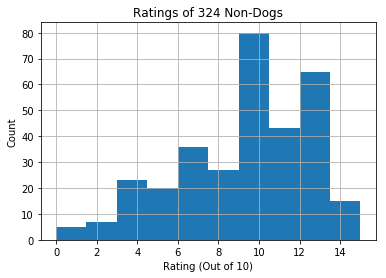

In [53]:
hist = df_non_dog_ratings[df_non_dog_ratings['rating_numerator'] <=20].hist(bins = 10)
plt.title('Ratings of 324 Non-Dogs')
plt.xlabel('Rating (Out of 10)')
plt.ylabel('Count');


Success!